In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

One Hot Representation

In [ ]:
corpus = [
    'Time flies like an arrow',
    'Fruit flies like a banana'
]
corpus

['Time flies like an arrow', 'Fruit flies like a banana']

In [ ]:
def get_vocab(corpus):
    vocab = []
    for sentence in corpus:
        for word in sentence.split():
            if word not in vocab:
                vocab.append(word.lower())
    return vocab

vocab = get_vocab(corpus)
vocab

['time', 'flies', 'like', 'an', 'arrow', 'fruit', 'a', 'banana']

In [ ]:
onehot_vectorizer = CountVectorizer(lowercase=True, binary=True)

onehot = onehot_vectorizer.fit_transform(corpus).toarray()

onehot


array([[1, 1, 0, 1, 0, 1, 1],
       [0, 0, 1, 1, 1, 1, 0]])

TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer = TfidfVectorizer()
tfidfvector = tfidfvectorizer.fit_transform(corpus).toarray()

tfidfvector

array([[0.49922133, 0.49922133, 0.        , 0.35520009, 0.        ,
        0.35520009, 0.49922133],
       [0.        , 0.        , 0.57615236, 0.40993715, 0.57615236,
        0.40993715, 0.        ]])

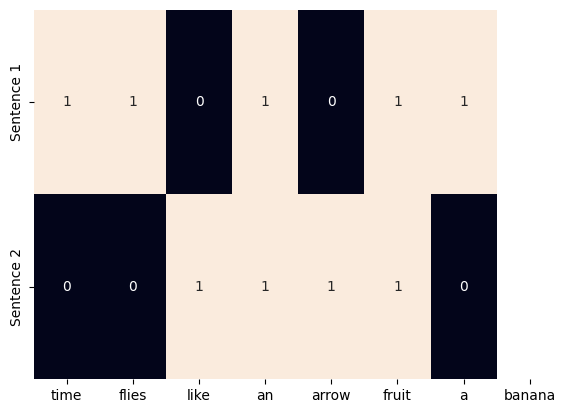

In [ ]:
#plt.figure(figsize=(15,5))
sns.heatmap(onehot, annot=True, cbar=False, xticklabels=vocab, yticklabels=['Sentence 1','Sentence 2'])
plt.show()

#Tokenization

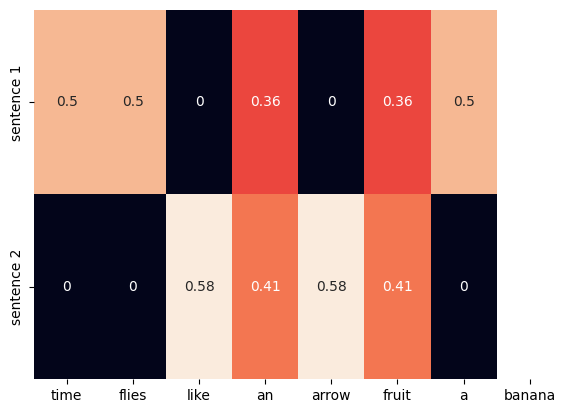

In [ ]:
sns.heatmap(tfidfvector, annot=True, cbar=False, xticklabels=vocab, yticklabels=['sentence 1','sentence 2'] )
plt.show()

In [ ]:
#import spacy
#nlp = spacy.load('en')

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm") # Load the small English model

In [ ]:
text = "Alok Singh, don't slap the Abhay."

In [ ]:
for tokens in nlp(text.lower()):
    print(tokens)

alok
singh
,
do
n't
slap
the
abhay
.


In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
tweet = u"Morning is cold and night is warm but still walking barefoot on this concrete @midnight:)"
tokenizer = TweetTokenizer()

Unigram, Bigram, Trigram, ... (N-Gram)

In [ ]:
tweet_tokens = tokenizer.tokenize(tweet)
tweet_tokens

['Morning',
 'is',
 'cold',
 'and',
 'night',
 'is',
 'warm',
 'but',
 'still',
 'walking',
 'barefoot',
 'on',
 'this',
 'concrete',
 '@midnight',
 ':)']

In [ ]:
def n_gram(text, n):
    return [ text[i:i+n] for i in range(len(text)-n+1) ]

Lemmas, Stems

In [ ]:
n_gram(tweet_tokens,4)

[['Morning', 'is', 'cold', 'and'],
 ['is', 'cold', 'and', 'night'],
 ['cold', 'and', 'night', 'is'],
 ['and', 'night', 'is', 'warm'],
 ['night', 'is', 'warm', 'but'],
 ['is', 'warm', 'but', 'still'],
 ['warm', 'but', 'still', 'walking'],
 ['but', 'still', 'walking', 'barefoot'],
 ['still', 'walking', 'barefoot', 'on'],
 ['walking', 'barefoot', 'on', 'this'],
 ['barefoot', 'on', 'this', 'concrete'],
 ['on', 'this', 'concrete', '@midnight'],
 ['this', 'concrete', '@midnight', ':)']]

In [ ]:
doc = nlp(u"Let's go for a dinner tonight")

In [ ]:
for token in doc:
    print(f'{token} \t --> {token.lemma_}')

Let 	 --> let
's 	 --> us
go 	 --> go
for 	 --> for
a 	 --> a
dinner 	 --> dinner
tonight 	 --> tonight


POS Tagging

In [ ]:
doc = nlp("I'm hungry")

In [ ]:
for token in doc:
    print(f'{token} \t {token.pos_}')

I 	 PRON
'm 	 AUX
hungry 	 ADJ


Chunking and NER

In [ ]:
doc = nlp("Alok is Starving")

In [ ]:
for chunk in doc.noun_chunks:
    print(f'{chunk} : {chunk.label_}')

Alok : NP


In [ ]:
from spacy import displacy

doc = nlp("Alok was born in India(Thakur Dynasty) and studying in NIET.")

In [ ]:
displacy.render(doc, style='ent',jupyter=True)

Structure of the sentences

In [ ]:
doc = nlp("Alok ")

In [ ]:
displacy.render(doc, style='dep', jupyter=True)